In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
dfTrain = pd.read_csv('train.csv', delimiter=',')
dfTest = pd.read_csv('test.csv', delimiter=',')

In [3]:
dfTest["SalePrice"]=np.nan

In [4]:
dfGlobal=pd.concat([dfTrain,dfTest])
iDs=dfGlobal["Id"]
dfGlobal=dfGlobal.drop(columns=["Id"])

In [6]:
def prepareVariablesExplicatives(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    colonnesNumeriques=list(set(df.select_dtypes(include=numerics).columns)-set(["SalePrice"]))
    display(df[colonnesNumeriques].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8))
    dfFiltre=df[colonnesNumeriques].fillna(0)
    dfFiltre=pd.concat([df[["SalePrice"]],dfFiltre], axis=1)
    colonnesAutres=set(df.columns)-set(list(colonnesNumeriques)+["SalePrice"])
    dfNum=dfFiltre
    for c in colonnesAutres:
        dfNum=pd.concat([dfNum,pd.get_dummies(df[c])],axis=1)
    return dfNum    

array([[<Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'MiscVal'}>,
        <Axes: title={'center': '3SsnPorch'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>],
       [<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'PoolArea'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'MoSold'}>,
        <Axes: title={'center': 'GarageArea'}>],
       [<Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'OverallQual

,SalePrice,Fireplaces,MiscVal,3SsnPorch,FullBath,GrLivArea,WoodDeckSF,BedroomAbvGr,MSSubClass,LowQualFinSF,...,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,AllPub,NoSeWa
0,208500.0,0,0,0,2,1710,0,3,60,0,...,False,False,False,False,False,True,False,False,True,False
1,181500.0,1,0,0,2,1262,298,3,20,0,...,False,False,True,False,False,False,False,False,True,False
2,223500.0,1,0,0,2,1786,0,3,60,0,...,False,False,False,False,False,True,False,False,True,False
3,140000.0,1,0,0,1,1717,0,3,70,0,...,False,False,False,False,False,True,False,False,True,False
4,250000.0,1,0,0,2,2198,192,4,60,0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,0,0,0,1,1092,0,3,160,0,...,False,False,False,False,False,True,False,False,True,False
1455,NaN,0,0,0,1,1092,0,3,160,0,...,False,False,False,False,False,True,False,False,True,False
1456,NaN,1,0,0,1,1224,474,4,20,0,...,False,False,True,False,False,False,False,False,True,False
1457,NaN,0,700,0,1,970,80,3,85,0,...,False,False,False,False,False,False,True,False,True,False


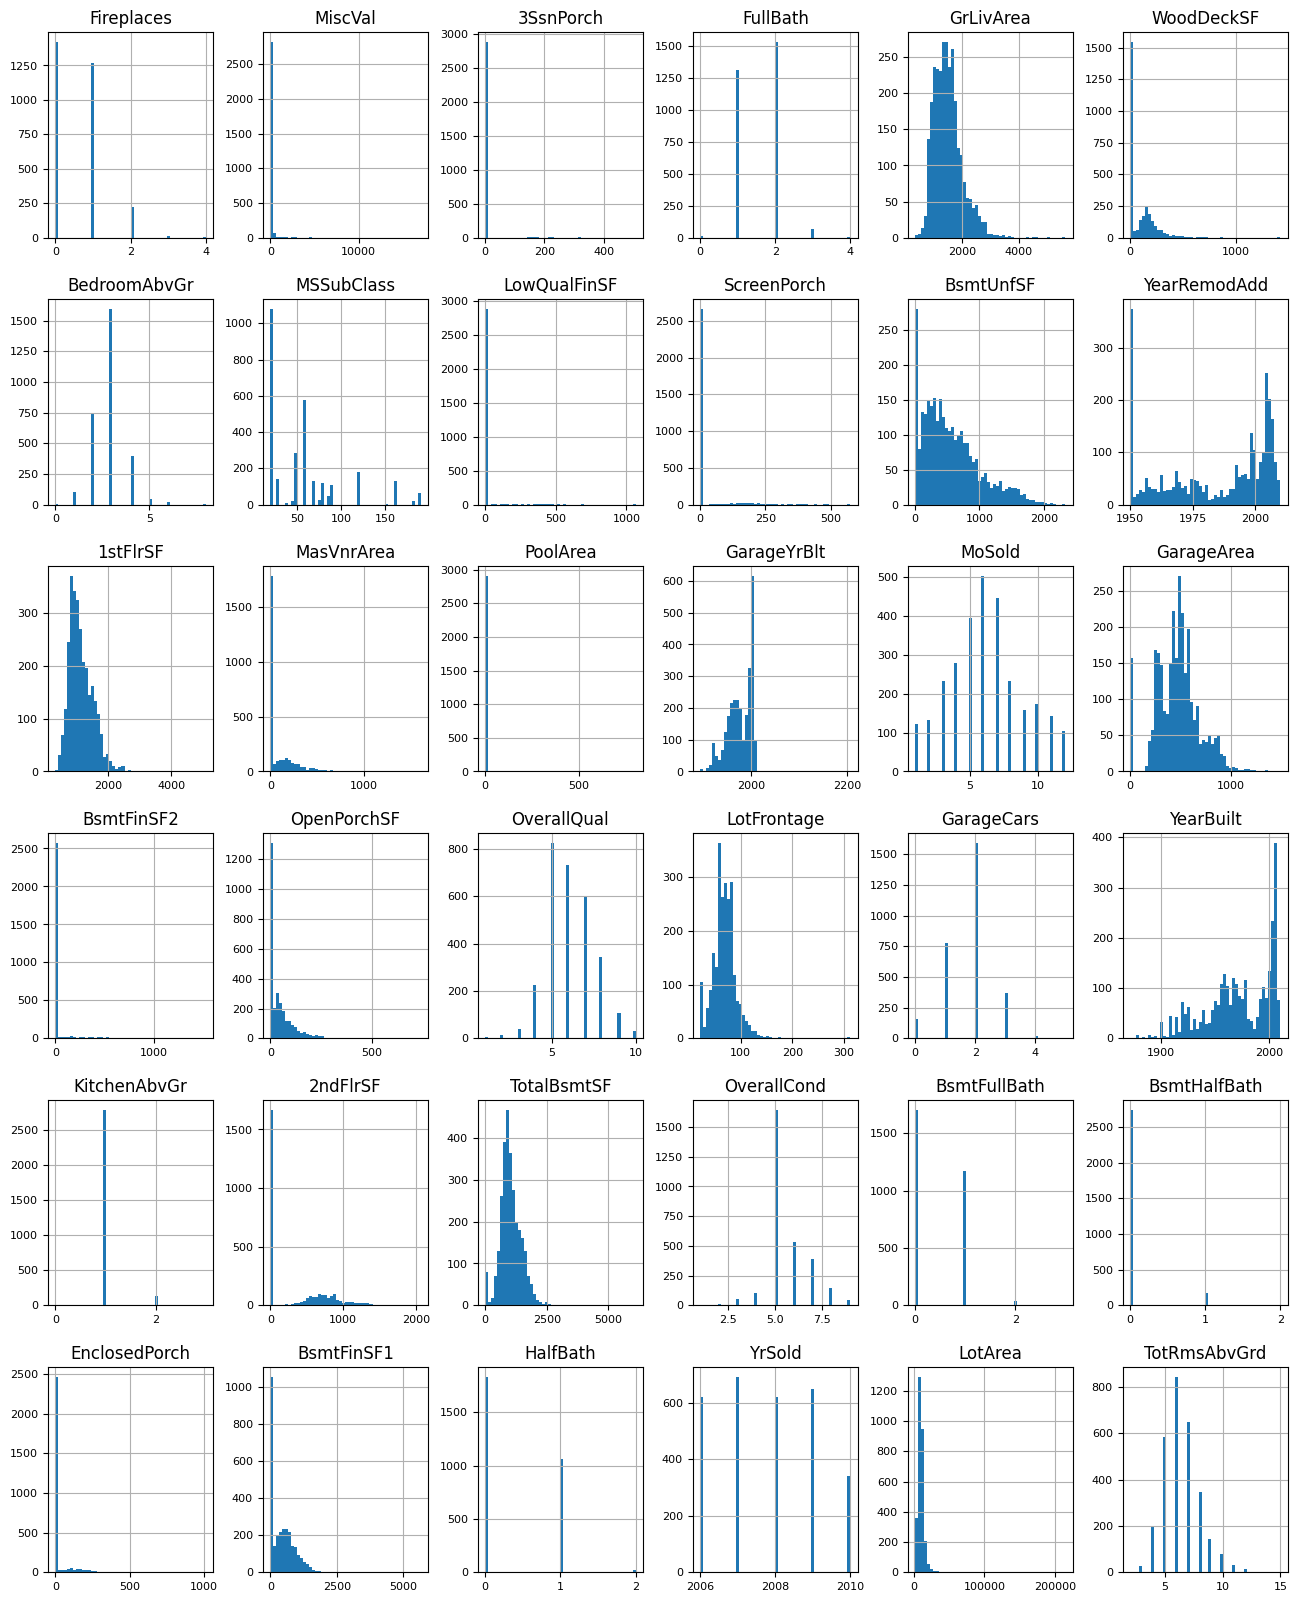

In [7]:
dfNumGlobal=prepareVariablesExplicatives(dfGlobal)
dfNumGlobal

In [8]:
dfNumFit=dfNumGlobal.dropna(subset=["SalePrice"])
dfNumFit

,SalePrice,Fireplaces,MiscVal,3SsnPorch,FullBath,GrLivArea,WoodDeckSF,BedroomAbvGr,MSSubClass,LowQualFinSF,...,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,AllPub,NoSeWa
0,208500.0,0,0,0,2,1710,0,3,60,0,...,False,False,False,False,False,True,False,False,True,False
1,181500.0,1,0,0,2,1262,298,3,20,0,...,False,False,True,False,False,False,False,False,True,False
2,223500.0,1,0,0,2,1786,0,3,60,0,...,False,False,False,False,False,True,False,False,True,False
3,140000.0,1,0,0,1,1717,0,3,70,0,...,False,False,False,False,False,True,False,False,True,False
4,250000.0,1,0,0,2,2198,192,4,60,0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,1,0,0,2,1647,0,3,60,0,...,False,False,False,False,False,True,False,False,True,False
1456,210000.0,2,0,0,2,2073,349,3,20,0,...,False,False,True,False,False,False,False,False,True,False
1457,266500.0,2,2500,0,2,2340,0,4,70,0,...,False,False,False,False,False,True,False,False,True,False
1458,142125.0,0,0,0,1,1078,366,2,20,0,...,False,False,True,False,False,False,False,False,True,False


## Ridge regression 

In [25]:
from sklearn import linear_model
X = dfNumFit.values[:,1:]
y = dfNumFit.values[:,:1]
reg = linear_model.Ridge(alpha=.5)
reg.fit(X,y)
display(reg.score(X,y))


0.9264947496974131

## Lasso model 

In [26]:
from sklearn import linear_model
X = dfNumFit.values[:,1:]
y = dfNumFit.values[:,:1]
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X,y)
display(reg.score(X,y))

c:\Users\elean\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.083e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


0.9331844889805057

## LARS lasso model 

In [34]:
from sklearn import linear_model
X = dfNumFit.values[:,1:]
y = dfNumFit.values[:,:1]
reg = linear_model.ElasticNet(alpha=0.08, l1_ratio=0.5)
reg.fit(X,y)
display(reg.score(X,y))

c:\Users\elean\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.250e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


0.8798379938108286

# avec regression linéaire

In [24]:
from sklearn.linear_model import LinearRegression
X = dfNumFit.values[:,1:]
y = dfNumFit.values[:,:1]
reg = LinearRegression().fit(X, y)
display(reg.score(X, y))

0.9331962026582508

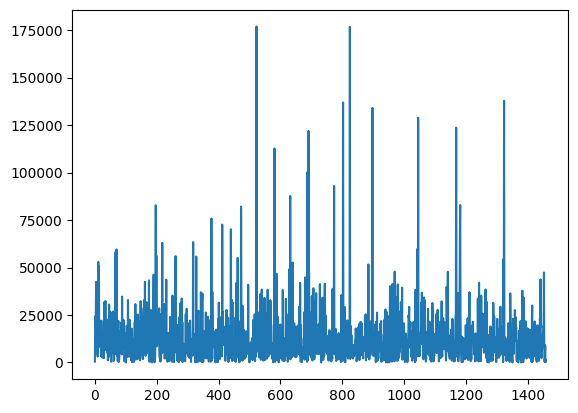

In [25]:
plt.plot(abs(y-reg.predict(X)))

In [26]:
mae = abs(y-reg.predict(X)).mean()
print("The mean absolute error on training set: {:.4f}".format(mae))

The mean absolute error on training set: 13228.5828


In [27]:
dfNumTest=dfNumGlobal

In [28]:
predictions=reg.predict(dfNumTest.values[:,1:])
predictions.squeeze()

array([208965.79177952, 205786.58633518, 205998.31472874, ...,
       176531.72702312, 115062.15455341, 223448.91868305])

# Avec xgboost

In [ ]:
# import xgboost as xgb
# reg = xgb.XGBRegressor(
#     objective='reg:squarederror',
#     max_depth=500,
#     n_estimators=500
# )

In [ ]:
# X = dfNumFit.values[:,1:]
# X = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
# y = dfNumFit.values[:,:1]

# reg.fit(X, y)


In [ ]:
# mae = abs(y-reg.predict(X)).mean()
# print("The mean absolute error on training set: {:.4f}".format(mae))

# Soumission

In [29]:
dfSoumission=pd.DataFrame({"Id":iDs, "SalePrice":list(predictions.squeeze())})
dfSoumission

,Id,SalePrice
0,1,208965.791780
1,2,205786.586335
2,3,205998.314729
3,4,165264.687486
4,5,292485.556918
...,...,...
1454,2915,84441.324616
1455,2916,80403.953965
1456,2917,176531.727023
1457,2918,115062.154553


In [ ]:
dfSoumission=dfSoumission[dfSoumission["Id"].isin(dfTest.Id.values)]

In [ ]:
dfSoumission.to_csv("my_submission.csv", sep=',', index=False)